In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Definindo a Curva Roc

In [3]:
def plotarCurvaROC(title, modeloClassificador, base, alvo):
    x_train, x_test, y_train, y_test = train_test_split(base.drop(alvo,axis=1),
                                                        base[alvo],
                                                        test_size=0.3,
                                                        random_state=42);

    # Fit nos dados
    modeloClassificador.fit(x_train, y_train)

    # Realizando a predição
    resultadoTeste = modeloClassificador.predict(x_test)
    
    # Exibindo a Curva
    exibirCurvaROC(title, modeloClassificador, x_test, y_test)

In [2]:
def exibirCurvaROC(title, modeloClassificador, x_test, y_test):
    y_preds = modeloClassificador.predict_proba(x_test)

    # take the second column because the classifier outputs scores for the 0 class as well
    preds = y_preds[:,1]

    # fpr (false-positive-rate) e tpr (true-positive-rate)
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    auc_score = metrics.auc(fpr, tpr)

    # Construindo o Gráfico
    plt.clf()
    plt.title(title)
    plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
    plt.plot([0,1],[0,1],'r--')

    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    plt.legend(loc='lower right')
    plt.show()

In [ ]:
def valorCurvaROC(modeloClassificador, x_test, y_test):
    y_preds = modeloClassificador.predict_proba(x_test)

    # take the second column because the classifier outputs scores for the 0 class as well
    preds = y_preds[:,1]

    # fpr (false-positive-rate) e tpr (true-positive-rate)
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    auc_score = metrics.auc(fpr, tpr)

    # Construindo o Gráfico
    return auc_score

In [ ]:
### Multiplas AUC

In [ ]:
#ROC Curve
# from sklearn.metrics import roc_curve
# y_pred_prob1 = classifier1.predict_proba(X_test)[:,1]
# fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred_prob1)

# y_pred_prob2 = classifier2.predict_proba(X_test)[:,1]
# fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred_prob2)


# y_pred_prob3 = classifier3.predict_proba(X_test)[:,1]
# fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred_prob3)

# y_pred_prob4 = classifier4.predict_proba(X_test)[:,1]
# fpr4 , tpr4, thresholds4 = roc_curve(Y_test, y_pred_prob4)


# plt.plot([0,1],[0,1], 'k--')
# plt.plot(fpr1, tpr1, label= "Linear")
# plt.plot(fpr2, tpr2, label= "Poly")
# plt.plot(fpr3, tpr3, label= "RBF")
# plt.plot(fpr4, tpr4, label= "Sigmoid")
# plt.legend()
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.title('Receiver Operating Characteristic')
# plt.show()

### Definindo os Modelos

In [11]:
hiperparametrosAB = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0, n_estimators=50, random_state=410)

hiperparametrosRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, 
                                           criterion='gini', max_depth=None, max_features='auto', 
                                           max_leaf_nodes=None, max_samples=None, 
                                           min_impurity_decrease=0.0,
                                           min_samples_leaf=1, min_samples_split=2,
                                           min_weight_fraction_leaf=0.0, n_estimators=100,
                                           n_jobs=-1, oob_score=False, random_state=7374, verbose=0,
                                           warm_start=False)

hiperparametrosLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                                       intercept_scaling=1, l1_ratio=None, max_iter=1000, multi_class='auto', 
                                       n_jobs=None, penalty='l2', random_state=1340, solver='lbfgs', 
                                       tol=0.0001, verbose=0, warm_start=False)
                    

hiperparametrosGB = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None,
                           random_state=2333, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
modelos = {
            "AB": hiperparametrosAB,
            "RF": hiperparametrosRF,
            "LR": hiperparametrosLR,
            "GB": hiperparametrosGB,
          }

### Visualizando a curva ROC - Óbito / Curado

In [6]:
# Carregando a Base de Dados
#url = 'Vacinas/OC/oc-vacina-6040-sp.xlsx'
url = 'PreProcessamento/balanceadas/OC/ba-oc-6040-sp.xlsx'
alvo = 'evolucaoCaso'
baseObitoCurado = pd.read_excel(url)

In [7]:
# Selecionando os atributos
# atributosSelecionados = ['faixaetaria', 'dispneia', 'qntVacinas', 'dorDeGarganta', 
#                          'coriza', 'diabetes', 'dorDeCabeca', 'cardiaca', 'evolucaoCaso']

atributosSelecionados = ['evolucaoCaso', 'faixaDiasSintomas', 'dorDeGarganta', 'cardiaca', 'dispneia', 
                       'coriza','dorDeCabeca', 'obesidade', 'qntVacinas', 'faixaetaria']


baseObitoCurado = baseObitoCurado.loc[:, atributosSelecionados]

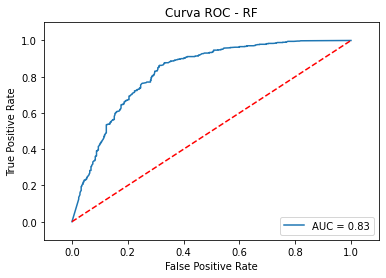

In [9]:
# Curva ROC - Random Forest
plotarCurvaROC('Curva ROC - RF', modelos["RF"], baseObitoCurado, alvo)

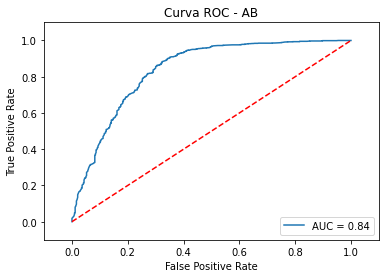

In [9]:
# Curva ROC - Ada Boost
plotarCurvaROC('Curva ROC - AB', modelos["AB"], baseObitoCurado, alvo)

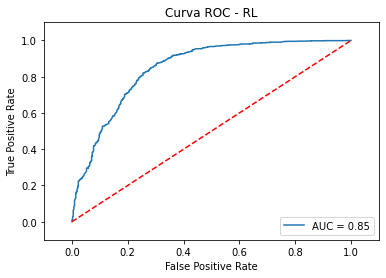

In [10]:
# Curva ROC - Regressão Logística
plotarCurvaROC('Curva ROC - RL', modelos["LR"], baseObitoCurado, alvo)

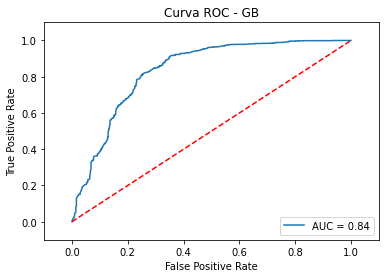

In [11]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - GB', modelos["GB"], baseObitoCurado, alvo)

### Visualizando a curva ROC - Óbito / Curado

In [23]:
# Carregando a Base de Dados
# urlIC = 'Vacinas/Regioes/IC/ic-vacina-6040-sudeste.xlsx'
urlIC = 'PreProcessamento/balanceadas/Regioes/ba-ic-6040-sudeste.xlsx'
alvo = 'evolucaoCaso'
baseInternadoCurado = pd.read_excel(urlIC)
baseInternadoCurado['evolucaoCaso'].value_counts()

1    2738
2    1096
Name: evolucaoCaso, dtype: int64

In [13]:
# # Definindo os atributos removidos
# colunasRemovidas = ['dataPrimeiraDose', 'dataSegundaDose', 'disturbiosGustatorios', 'disturbiosOlfativos', 
#                     'puerpera', 'respiratoria', 'tosse', 'febre', 'assintomatico', 'obesidade']

# baseInternadoCurado = baseInternadoCurado.drop(columns = colunasRemovidas)

In [25]:
atributosSelecionados = ['faixaetaria', 'dispneia', 'dorDeGarganta', 'dorDeCabeca', 'coriza', 
                       'diabetes', 'obesidade', 'sexo', 'qntVacinas', 'imunossupressao', 
                       'assintomatico', 'gestante', 'renal', 'hipertensao', 'faixaDiasSintomas', 'evolucaoCaso']

baseInternadoCurado = baseInternadoCurado.loc[:, atributosSelecionados]

In [26]:
# Convertendo os valores internado (2 -> 0)
baseInternadoCurado['evolucaoCaso'] = baseInternadoCurado['evolucaoCaso'].replace([1, 2], [1, 0])
baseInternadoCurado['evolucaoCaso'].value_counts()

1    2738
0    1096
Name: evolucaoCaso, dtype: int64

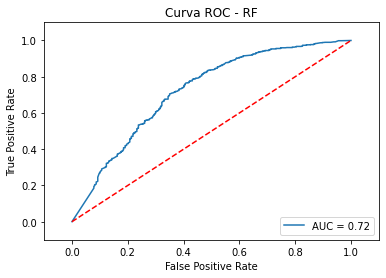

In [27]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - RF', modelos["RF"], baseInternadoCurado, alvo)

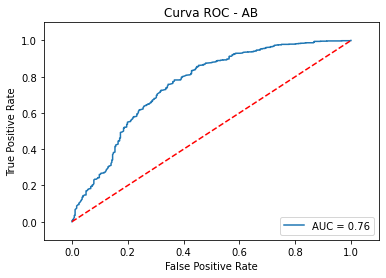

In [28]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - AB', modelos["AB"], baseInternadoCurado, alvo)

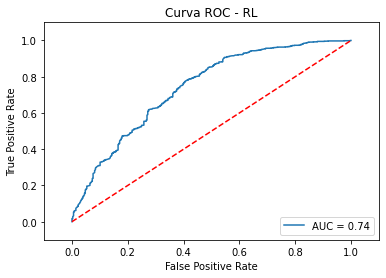

In [29]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - RL', modelos["LR"], baseInternadoCurado, alvo)

In [ ]:
# Curva ROC - XGBoost
plotarCurvaROC('Curva ROC - GB', modelos["GB"], baseInternadoCurado, alvo)

In [1]:
# balanced_and_smote_oc = {'OC 60/40': 'PreProcessamento/balanceadas/OC/ba-oc-6040-sp.xlsx', 
#                       'OC 70/30': 'PreProcessamento/balanceadas/OC/ba-oc-7030-sp.xlsx',
#                       'Smote OC 60/40': 'PreProcessamento/balanceadas/Smote/sm-oc-6040-sp.xlsx',
#                       'Smote OC 70/30': 'PreProcessamento/balanceadas/Smote/sm-oc-7030-sp.xlsx',
#                      }

# balanced_and_smote_ic = {'IC 60/40': 'PreProcessamento/balanceadas/IC/ba-ic-6040-sp.xlsx',
#                          'IC 70/30': 'PreProcessamento/balanceadas/IC/ba-ic-7030-sp.xlsx',
#                          'Smote IC 60/40': 'PreProcessamento/balanceadas/Smote/sm-ic-6040-sp.xlsx',
#                          'Smote IC 70/30': 'PreProcessamento/balanceadas/Smote/sm-ic-7030-sp.xlsx',
#                         }

## Múltiplas Curvas ROC

In [48]:
url = 'PreProcessamento/balanceadas/OC/ba-oc-6040-sp.xlsx'
alvo = 'evolucaoCaso'

base = pd.read_excel(url)

In [14]:
# (Modelo OC)
# atributosSelecionados = ['faixaetaria', 'dispneia', 'qntVacinas', 'coriza', 'dorDeGarganta', 
#                        'dorDeCabeca', 'obesidade', 'diabetes', 'faixaDiasSintomas', 'evolucaoCaso']

# (Modelo IC)
# atributosSelecionados = ['faixaetaria', 'dorDeCabeca', 'dorDeGarganta', 'renal', 'dispneia', 'diabetes',  
#                        'tosse', 'qntVacinas', 'faixaDiasSintomas', 'coriza', 'febre', 'evolucaoCaso']

# base = baseInternadoCurado.loc[:, atributosSelecionados]

### Treinando os Classificadores

In [49]:
x_train, x_test, y_train, y_test = train_test_split(base.drop(alvo,axis=1),
                                                        base[alvo],
                                                        test_size=0.3,
                                                        random_state=42);

In [50]:
classifier1 = modelos["AB"]
classifier1.fit(x_train, y_train)

classifier2 = modelos["RF"]
classifier2.fit(x_train, y_train)

classifier3 = modelos["LR"]
classifier3.fit(x_train, y_train)

classifier4 = modelos["GB"]
classifier4.fit(x_train, y_train)

GradientBoostingClassifier(random_state=2333)

### Plotando as Curvas

In [22]:
# from sklearn.metrics import roc_curve
# y_pred_prob1 = classifier1.predict_proba(x_test)[:,1]
# fpr, tpr, _ = roc_curve(x_test, y_pred_prob1)

# y_pred_prob2 = classifier2.predict_proba(x_test)[:,1]
# fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


# y_pred_prob3 = classifier3.predict_proba(x_test)[:,1]
# fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

# y_pred_prob4 = classifier4.predict_proba(x_test)[:,1]
# fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)


# plt.plot([0,1],[0,1], 'k--')
# plt.plot(fpr1, tpr1, label= "Linear")
# plt.plot(fpr2, tpr2, label= "Poly")
# plt.plot(fpr3, tpr3, label= "RBF")
# plt.plot(fpr4, tpr4, label= "Sigmoid")
# plt.legend()
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.title('Receiver Operating Characteristic')
# plt.show()

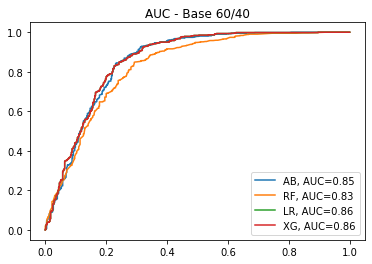

In [51]:
plt.figure(0).clf()

y_pred = classifier1.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, label="AB, AUC="+str(auc))

y_pred = classifier2.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, label = "RF, AUC=" + str(auc))

y_pred = classifier3.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, label = "LR, AUC=" + str(auc))

y_pred = classifier3.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, label = "XG, AUC=" + str(auc))

plt.title('AUC - Base 60/40')
plt.legend()